In [22]:
from PIL import Image
import os
import gzip
import numpy as np

def load_fashion(path, kind='train'):

    """Load MNIST data from `path`"""
    labels_path = os.path.join(path, f'{kind}-labels-idx1-ubyte.gz')
    images_path = os.path.join(path,f'{kind}-images-idx3-ubyte.gz')

    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,
                               offset=8)

    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(labels), 784)
    images = [Image.fromarray(255 - image.reshape(28, 28)).convert('RGB') for image in images]

    return images, labels

images, labels = load_fashion('/data/commonsense-data-selection/visual_detail/PerLim/data/fashion', kind='t10k')

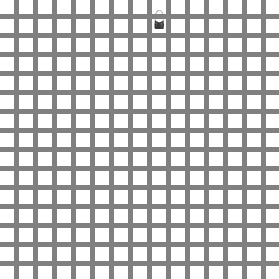

In [35]:
import numpy as np
from PIL import Image

def split_image_into_grids(image_path, grid_size=14, interval=5):
    # Open the image
    img = Image.open(image_path)
    
    # Ensure the image is 224x224
    img = img.resize((224, 224))
    
    # Convert image to numpy array
    img_array = np.array(img)
    
    # Create a new blank image with grey background
    new_size = 224 + (224 // (grid_size + interval)) * interval
    new_img = Image.new('RGB', (new_size, new_size), color='grey')
    
    # Split the image into grids
    for x in range(0, 224, grid_size):
        for y in range(0, 224, grid_size):
            # Extract the grid
            grid = img_array[x:x+grid_size, y:y+grid_size]
            
            # Calculate the position in the new image
            new_x = x + (x // (grid_size)) * interval
            new_y = y + (y // (grid_size)) * interval
            
            # Paste the grid onto the new image
            new_img.paste(Image.fromarray(grid), (new_y, new_x))
    
    return new_img

split_image_into_grids('/data/commonsense-data-selection/visual_detail/PerLim/data/fashion/images/blip2-flan-t5-xxl/hcut/34_8_10.png')

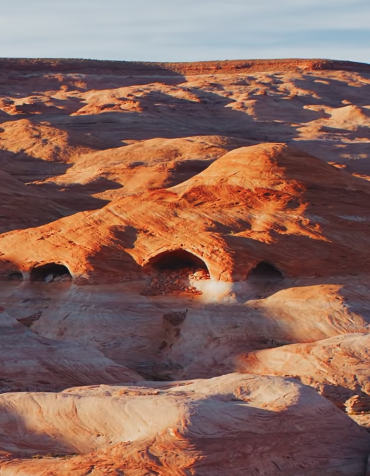

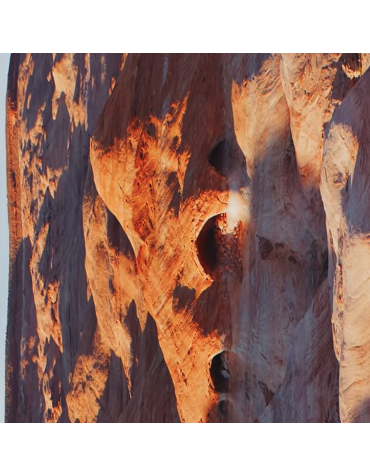

In [2]:
from PIL import Image
image = Image.open('/workspace/PerLim/a.png')
display(image)
display(image.rotate(90))